In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np


In [51]:
data=pd.read_csv('Food_Delivery_Time_Prediction.csv')

In [52]:
data.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,1001,Area C,Zone Z,9.14,Cloudy,Medium,8,Medium,Night,Bike,3.9,3.1,34.4,689.38,41.75
1,1002,Area D,Zone Z,19.37,Stormy,Medium,1,Medium,Morning,Scooter,4.4,3.2,73.4,429.22,29.12
2,1003,Area A,Zone X,19.31,Clear,High,7,Low,Evening,Scooter,4.3,3.7,47.3,451.44,10.23
3,1004,Area C,Zone X,17.21,Clear,Medium,1,Medium,Morning,Scooter,3.8,2.6,57.7,187.30,9.20
4,1005,Area C,Zone Y,6.59,Stormy,Low,7,Low,Morning,Scooter,4.6,2.6,24.5,369.76,29.07


In [53]:
data.shape

(200, 15)

In [54]:
data['Weather_Conditions'] = data['Weather_Conditions'].astype('category').cat.codes
data['Traffic_Conditions'] = data['Traffic_Conditions'].astype('category').cat.codes
data['Order_Priority'] = data['Order_Priority'].astype('category').cat.codes
data['Order_Time'] = data['Order_Time'].astype('category').cat.codes
data['Vehicle_Type'] = data['Vehicle_Type'].astype('category').cat.codes
dataf=data.drop(['Order_ID','Customer_Location','Restaurant_Location'],axis=1)


In [55]:
correlation=dataf.corr(method='pearson')['Delivery_Time']

In [56]:
correlation

Distance                      0.881056
Weather_Conditions           -0.002515
Traffic_Conditions           -0.277638
Delivery_Person_Experience   -0.115686
Order_Priority                0.097824
Order_Time                   -0.036439
Vehicle_Type                  0.012650
Restaurant_Rating             0.000108
Customer_Rating              -0.119954
Delivery_Time                 1.000000
Order_Cost                   -0.027585
Tip_Amount                   -0.047687
Name: Delivery_Time, dtype: float64

In [57]:
# Distance Traffic_Conditions  Customer Rating Delivery_Time
data = data[['Distance', 'Traffic_Conditions','Delivery_Time']]

In [58]:
data

,Distance,Traffic_Conditions,Delivery_Time
0,9.14,2,34.4
1,19.37,2,73.4
2,19.31,0,47.3
3,17.21,2,57.7
4,6.59,1,24.5
...,...,...,...
195,19.75,2,76.3
196,8.11,1,17.2
197,8.04,0,22.9
198,16.44,1,53.9


In [64]:
x=data.iloc[:,0:2]
y=data.iloc[:,-1]
x=np.array(x)
y=np.array(y)

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [78]:
# def main(data):
#     if data['Traffic_Conditions']==2:
#         if data['Distance']/data['Delivery_Time']/60>=0.6:
#             return 1
#         elif data['Distance']/data['Delivery_Time']/60<0.6:
#             return 0
#     elif data['Traffic_Conditions']==1:
#         if data['Distance']/data['Delivery_Time']/60>=0.5:
#             return 1
#         elif data['Distance']/data['Delivery_Time']/60<0.5:
#             return 0
#     else:
#         if data['Distance']/data['Delivery_Time']/60>=0.4:
#             return 1
#         elif data['Distance']/data['Delivery_Time']/60<0.4:
#             return 0



def main(row):
    speed = row['Distance'] / row['Delivery_Time']  # Speed in distance per minute

    if row['Traffic_Conditions'] == 2:
        return 1 if speed >= 0.3 else 0  # Adjusted threshold
    elif row['Traffic_Conditions'] == 1:
        return 1 if speed >= 0.25 else 0
    else:
        return 1 if speed >= 0.2 else 0

In [79]:
# for i in range(len(data)):
#     data.loc[i, "Time"] = main(data.loc[i])



data["Time"] = data.apply(main, axis=1)



In [80]:
data['Time']

0      0
1      0
2      1
3      0
4      1
      ..
195    0
196    1
197    1
198    1
199    1
Name: Time, Length: 200, dtype: int64

In [82]:
data

,Distance,Traffic_Conditions,Delivery_Time,Time
0,9.14,2,34.4,0
1,19.37,2,73.4,0
2,19.31,0,47.3,1
3,17.21,2,57.7,0
4,6.59,1,24.5,1
...,...,...,...,...
195,19.75,2,76.3,0
196,8.11,1,17.2,1
197,8.04,0,22.9,1
198,16.44,1,53.9,1


In [88]:
x=data.iloc[:,:3]
y=data.iloc[:,-1]


In [89]:
x

,Distance,Traffic_Conditions,Delivery_Time
0,9.14,2,34.4
1,19.37,2,73.4
2,19.31,0,47.3
3,17.21,2,57.7
4,6.59,1,24.5
...,...,...,...
195,19.75,2,76.3
196,8.11,1,17.2
197,8.04,0,22.9
198,16.44,1,53.9


In [90]:
y

0      0
1      0
2      1
3      0
4      1
      ..
195    0
196    1
197    1
198    1
199    1
Name: Time, Length: 200, dtype: int64

In [92]:
x=np.array(x)
y=np.array(y)

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [96]:
from sklearn.naive_bayes import GaussianNB

modelNB=GaussianNB()
modelNB.fit(x_train,y_train)

GaussianNB()

In [98]:
y_pred=modelNB.predict(x_test)

In [99]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [100]:
y_test

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [101]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy_score=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy_score)
confusion_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:",confusion_matrix)

Accuracy: 0.85
Confusion Matrix: [[ 7  5]
 [ 1 27]]


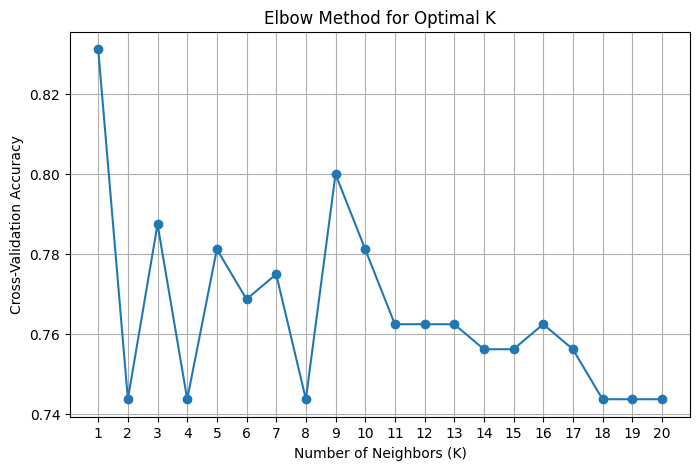

Best K: 1


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

k_values=range(1,21)
cv_scores=[]


for i in k_values:
    knn=KNeighborsClassifier(n_neighbors=i)
    scores=cross_val_score(knn,x_train,y_train,cv=5,scoring='accuracy')
    cv_scores.append(scores.mean())
    
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Elbow Method for Optimal K")
plt.xticks(k_values)
plt.grid()
plt.show()


best_k=k_values[np.argmax(cv_scores)]    
print(f"Best K: {best_k}")

In [103]:
modelNB=KNeighborsClassifier(n_neighbors=1)
modelNB.fit(x_train,y_train)
y_pred=modelNB.predict(x_test)


In [104]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [105]:
y_test

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [106]:
accuracy_score(y_test, y_pred)

0.825

In [107]:
from sklearn.tree import DecisionTreeClassifier
modelDT=DecisionTreeClassifier()
modelDT.fit(x_train,y_train)
y_pred=modelDT.predict(x_test)

In [108]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [109]:
y_test

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [110]:
accuracy_score(y_test, y_pred)

0.9